Train AUC: 0.7537
Test1 AUC: 0.7281
Test2 AUC: 0.6773
Best Threshold: 0.25413210472593484


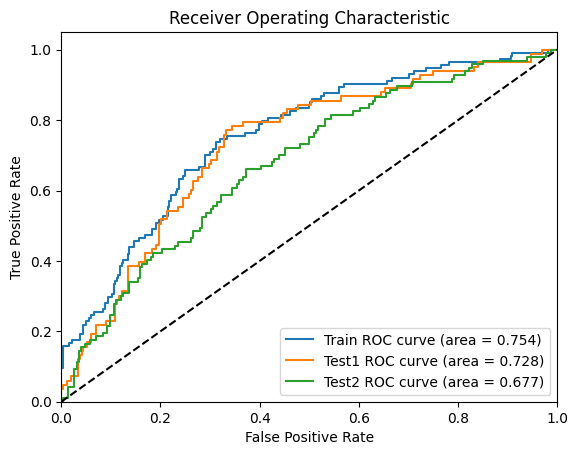

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 加载训练数据和两个验证数据
train_data = pd.read_csv("train.csv")
test_data1 = pd.read_csv("test1.csv")
test_data2 = pd.read_csv("ISPY2.csv")

X_train = train_data[['HR','HER2']]
X_train = train_data[['Global_FD']]
# X_train = train_data[['HR','HER2','Global_FD']]
y_train = train_data['PCR']

X_test1 = test_data1[['HR','HER2']]
X_test1 = test_data1[['Global_FD']]
# X_test1 = test_data1[['HR','HER2','Global_FD']]
y_test1 = test_data1['PCR']

X_test2 = test_data2[['HR','HER2']]
X_test2 = test_data2[['Global_FD']]
# X_test2 = test_data2[['HR','HER2','Global_FD']]
y_test2 = test_data2['PCR']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_scores_train = model.predict_proba(X_train)[:, 1]

output_train = train_data.copy()
output_train['probs'] = y_scores_train

y_scores_test1 = model.predict_proba(X_test1)[:, 1]
output_test1 = test_data1.copy()
output_test1['probs'] = y_scores_test1

y_scores_test2 = model.predict_proba(X_test2)[:, 1]
output_test2 = test_data2.copy()
output_test2['probs'] = y_scores_test2

roc_auc_train = roc_auc_score(y_train, y_scores_train)
roc_auc_test1 = roc_auc_score(y_test1, y_scores_test1)
roc_auc_test2 = roc_auc_score(y_test2, y_scores_test2)

print('Train AUC: {:.4f}'.format(roc_auc_train))
print('Test1 AUC: {:.4f}'.format(roc_auc_test1))
print('Test2 AUC: {:.4f}'.format(roc_auc_test2))

# 计算ROC曲线
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_scores_train)
fpr_test1, tpr_test1, thresholds_test1 = roc_curve(y_test1, y_scores_test1)
fpr_test2, tpr_test2, thresholds_test2 = roc_curve(y_test2, y_scores_test2)

j_stat_train = tpr_train - fpr_train
best_threshold_train = thresholds_train[j_stat_train.argmax()]

print('Best Threshold:', best_threshold_train)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.3f)' % roc_auc_train)
plt.plot(fpr_test1, tpr_test1, label='Test1 ROC curve (area = %0.3f)' % roc_auc_test1)
plt.plot(fpr_test2, tpr_test2, label='Test2 ROC curve (area = %0.3f)' % roc_auc_test2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
